# Drossel-Schwab Forest Fire Model

Four experiments:
1. **f/p Ratio Sweep** - Effect of fire-to-growth ratio
2. **p Parameter Sweep** - Effect of growth probability
3. **Grid Size Effects (RQ1)** - Scaling with system size
4. **f Parameter Sweep** - Effect of fire/lightning probability

In [14]:
import results
from utils import (
    create_experiment_dir, get_latest_experiment_dir,
    run_parallel_simulations, save_summary,
    load_experiment_data, load_summary_map,
    plot_fire_size_distribution, plot_density_timeseries, plot_cluster_size_distribution,
)

---
## Experiment 1: f/p Ratio Sweep

How does the ratio of fire probability to growth probability affect fire size distributions?

In [15]:
EXP1_NAME = "f_over_p"
L, steps, runs_per_param = 256, 5000, 3

f_over_p_ratios = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
p_values = [0.01, 0.05, 0.1]

exp1_param_list = []
param_idx = 0
for p in p_values:
    for ratio in f_over_p_ratios:
        param_idx += 1
        for run_idx in range(runs_per_param):
            exp1_param_list.append({'L': L, 'p': p, 'f': p * ratio, 'steps': steps,
                                    'param_id': param_idx, 'run_id': run_idx})

print(f"Experiment 1: {len(exp1_param_list)} simulations, {param_idx} parameter sets")

Experiment 1: 63 simulations, 21 parameter sets


In [ ]:
# Run (uncomment to execute)
exp1_outdir = create_experiment_dir(EXP1_NAME)
exp1_results = run_parallel_simulations(exp1_param_list, exp1_outdir)
save_summary(exp1_results, exp1_outdir)

Created experiment directory: /Users/andrew/Desktop/Computational Science/ComplexSystems/wildfires/data/f_over_p/experiment_4
Running 63 simulations with up to 16 workers...


Found 1 per-step files in /Users/andrew/Desktop/Computational Science/ComplexSystems/wildfires/data/f_over_p/experiment_17
Loaded runs for param_ids: [1]
Saved plot to /Users/andrew/Desktop/Computational Science/ComplexSystems/wildfires/results/exp1_fire_size_dist.png


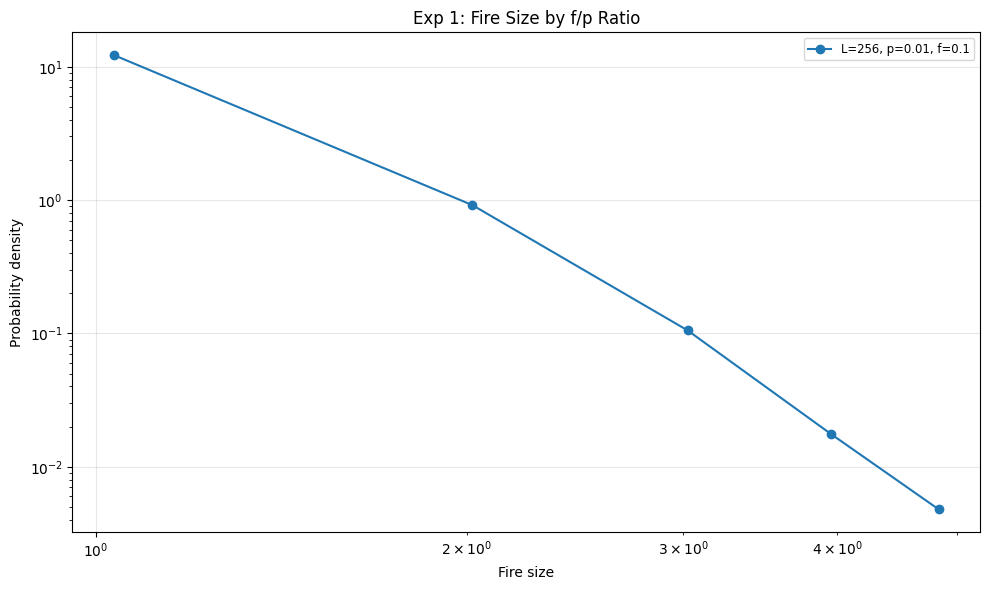

Saved plot to /Users/andrew/Desktop/Computational Science/ComplexSystems/wildfires/results/exp1_density_timeseries.png


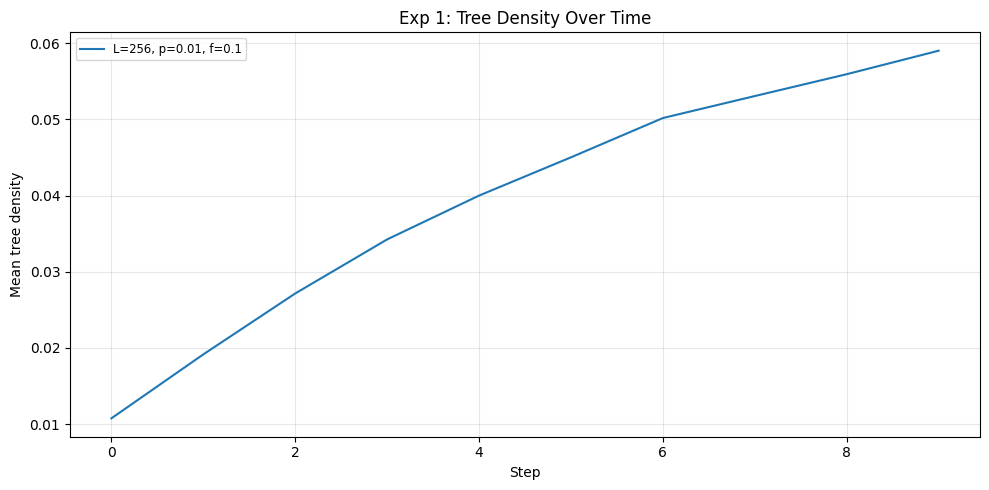

In [ ]:
# Analyze
try:
    exp1_dir = get_latest_experiment_dir(EXP1_NAME)
    exp1_data = load_experiment_data(exp1_dir)
    exp1_summary = load_summary_map(exp1_dir)
    plot_fire_size_distribution(exp1_data, exp1_summary, "Exp 1: Fire Size by f/p Ratio",
                                 results.path("exp1_fire_size_dist.png"))
    plot_density_timeseries(exp1_data, exp1_summary, "Exp 1: Tree Density Over Time",
                            results.path("exp1_density_timeseries.png"))
except FileNotFoundError as e:
    print(f"No data: {e}")

---
## Experiment 2: p Parameter Sweep

How does growth probability alone affect system dynamics?

In [ ]:
EXP2_NAME = "p_sweep"
L, steps, runs_per_param = 256, 5000, 3
f_fixed = 0.0001

p_values = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2]

exp2_param_list = []
for param_idx, p in enumerate(p_values, 1):
    for run_idx in range(runs_per_param):
        exp2_param_list.append({'L': L, 'p': p, 'f': f_fixed, 'steps': steps,
                                'param_id': param_idx, 'run_id': run_idx})

print(f"Experiment 2: {len(exp2_param_list)} simulations")

Experiment 2: 21 simulations


In [ ]:
# Run (uncomment to execute)
exp2_outdir = create_experiment_dir(EXP2_NAME)
exp2_results = run_parallel_simulations(exp2_param_list, exp2_outdir)
save_summary(exp2_results, exp2_outdir)

In [ ]:
# Analyze
try:
    exp2_dir = get_latest_experiment_dir(EXP2_NAME)
    exp2_data = load_experiment_data(exp2_dir)
    exp2_summary = load_summary_map(exp2_dir)
    plot_fire_size_distribution(exp2_data, exp2_summary, "Exp 2: Fire Size by p Value",
                                 results.path("exp2_fire_size_dist.png"))
    plot_density_timeseries(exp2_data, exp2_summary, "Exp 2: Tree Density by p Value",
                            results.path("exp2_density_timeseries.png"))
except FileNotFoundError as e:
    print(f"No data: {e}")

No data: Base directory not found: /Users/andrew/Desktop/Computational Science/ComplexSystems/wildfires/data/p_sweep


---
## Experiment 3: Grid Size Effects (RQ1)

How does system size L affect scaling? Is log-log slope constant? How does cut-off change?

In [ ]:
EXP3_NAME = "grid_size_rq1"
steps, runs_per_param = 5000, 3
p_fixed, f_fixed = 0.05, 0.0005

L_values = [32, 64, 128, 256, 512]

exp3_param_list = []
for param_idx, L in enumerate(L_values, 1):
    for run_idx in range(runs_per_param):
        exp3_param_list.append({'L': L, 'p': p_fixed, 'f': f_fixed, 'steps': steps,
                                'param_id': param_idx, 'run_id': run_idx})

print(f"Experiment 3: {len(exp3_param_list)} simulations, L = {L_values}")

Experiment 3: 15 simulations, L = [32, 64, 128, 256, 512]


In [ ]:
# Run (uncomment to execute)
exp3_outdir = create_experiment_dir(EXP3_NAME)
exp3_results = run_parallel_simulations(exp3_param_list, exp3_outdir)
save_summary(exp3_results, exp3_outdir)

In [ ]:
# Analyze
try:
    exp3_dir = get_latest_experiment_dir(EXP3_NAME)
    exp3_data = load_experiment_data(exp3_dir)
    exp3_summary = load_summary_map(exp3_dir)
    plot_fire_size_distribution(exp3_data, exp3_summary, "Exp 3: Fire Size by Grid Size L",
                                 results.path("exp3_fire_size_dist.png"))
    plot_cluster_size_distribution(exp3_data, exp3_summary, "Exp 3: Cluster Size by Grid Size L",
                                    results.path("exp3_cluster_size_dist.png"))
except FileNotFoundError as e:
    print(f"No data: {e}")

No data: Base directory not found: /Users/andrew/Desktop/Computational Science/ComplexSystems/wildfires/data/grid_size_rq1


---
## Experiment 4: f Parameter Sweep

How does fire/lightning probability alone affect system dynamics? (Complement to Exp 2)

In [ ]:
EXP4_NAME = "f_sweep"
L, steps, runs_per_param = 256, 5000, 3
p_fixed = 0.05

f_values = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01]

exp4_param_list = []
for param_idx, f in enumerate(f_values, 1):
    for run_idx in range(runs_per_param):
        exp4_param_list.append({'L': L, 'p': p_fixed, 'f': f, 'steps': steps,
                                'param_id': param_idx, 'run_id': run_idx})

print(f"Experiment 4: {len(exp4_param_list)} simulations")

Experiment 4: 21 simulations


In [ ]:
# Run (uncomment to execute)
exp4_outdir = create_experiment_dir(EXP4_NAME)
exp4_results = run_parallel_simulations(exp4_param_list, exp4_outdir)
save_summary(exp4_results, exp4_outdir)

In [ ]:
# Analyze
try:
    exp4_dir = get_latest_experiment_dir(EXP4_NAME)
    exp4_data = load_experiment_data(exp4_dir)
    exp4_summary = load_summary_map(exp4_dir)
    plot_fire_size_distribution(exp4_data, exp4_summary, "Exp 4: Fire Size by f Value",
                                 results.path("exp4_fire_size_dist.png"))
    plot_density_timeseries(exp4_data, exp4_summary, "Exp 4: Tree Density by f Value",
                            results.path("exp4_density_timeseries.png"))
except FileNotFoundError as e:
    print(f"No data: {e}")

No data: Base directory not found: /Users/andrew/Desktop/Computational Science/ComplexSystems/wildfires/data/f_sweep
